In [ ]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz 

# 데이터 경로
file_path = "/gdrive/Othercomputers/내 컴퓨터/Konkuk_ML/week3/PlayTennis.csv"
# 데이터 경로로부터 파일을 읽음 (pandas 라이브러리 사용)
datas = pd.read_csv(file_path)

# 데이터 출력 (데이터 형태 확인)
print(datas)

     outlook  temp humidity  windy  day      time play
0      sunny   hot     high  False  Fri  15-43-56   no
1      sunny   hot     high   True  Sun  14-30-40   no
2   overcast   hot     high  False  Sat  13-25-30  yes
3      rainy  mild     high  False  Sat  17-30-20  yes
4      rainy  cool   normal  False  Fri  21-45-10  yes
5      rainy  cool   normal   True  Sun  22-25-25   no
6   overcast  cool   normal   True  Sun  20-15-10  yes
7      sunny  mild     high  False  Wed  18-35-15   no
8      sunny  cool   normal  False  Fri  23-35-10  yes
9      rainy  mild   normal  False  Mon  19-20-49  yes
10     sunny  mild   normal   True  Tue  21-46-10  yes
11  overcast  mild     high   True  Sat  10-30-25  yes
12  overcast   hot   normal  False  Sun  14-13-24  yes
13     rainy  mild     high   True  Fri  18-20-43   no


1. time을 pandas의 time 자료형으로 변환

In [ ]:
datas['time'] = pd.to_datetime(datas['time'],format='%H-%M-%S')
datas['time']

0    1900-01-01 15:43:56
1    1900-01-01 14:30:40
2    1900-01-01 13:25:30
3    1900-01-01 17:30:20
4    1900-01-01 21:45:10
5    1900-01-01 22:25:25
6    1900-01-01 20:15:10
7    1900-01-01 18:35:15
8    1900-01-01 23:35:10
9    1900-01-01 19:20:49
10   1900-01-01 21:46:10
11   1900-01-01 10:30:25
12   1900-01-01 14:13:24
13   1900-01-01 18:20:43
Name: time, dtype: datetime64[ns]

2. time을 hour, minute로 나누기. -> second까지 feature로 넣는것은 쓸모 없는 변수가 추가되는 것으로 생각하고 제외

In [ ]:
datas['hour'] = datas['time'].dt.hour
datas['minute'] = datas['time'].dt.minute
datas['second'] = datas['time'].dt.second
datas

,outlook,temp,humidity,windy,day,time,play,hour,minute,second
0,sunny,hot,high,False,Fri,1900-01-01 15:43:56,no,15,43,56
1,sunny,hot,high,True,Sun,1900-01-01 14:30:40,no,14,30,40
2,overcast,hot,high,False,Sat,1900-01-01 13:25:30,yes,13,25,30
3,rainy,mild,high,False,Sat,1900-01-01 17:30:20,yes,17,30,20
4,rainy,cool,normal,False,Fri,1900-01-01 21:45:10,yes,21,45,10
5,rainy,cool,normal,True,Sun,1900-01-01 22:25:25,no,22,25,25
6,overcast,cool,normal,True,Sun,1900-01-01 20:15:10,yes,20,15,10
7,sunny,mild,high,False,Wed,1900-01-01 18:35:15,no,18,35,15
8,sunny,cool,normal,False,Fri,1900-01-01 23:35:10,yes,23,35,10
9,rainy,mild,normal,False,Mon,1900-01-01 19:20:49,yes,19,20,49


3. time column 제거

In [ ]:
datas.drop(columns='time',inplace=True)
datas

,outlook,temp,humidity,windy,day,play,hour,minute,second
0,sunny,hot,high,False,Fri,no,15,43,56
1,sunny,hot,high,True,Sun,no,14,30,40
2,overcast,hot,high,False,Sat,yes,13,25,30
3,rainy,mild,high,False,Sat,yes,17,30,20
4,rainy,cool,normal,False,Fri,yes,21,45,10
5,rainy,cool,normal,True,Sun,no,22,25,25
6,overcast,cool,normal,True,Sun,yes,20,15,10
7,sunny,mild,high,False,Wed,no,18,35,15
8,sunny,cool,normal,False,Fri,yes,23,35,10
9,rainy,mild,normal,False,Mon,yes,19,20,49


In [ ]:
# 범주형 데이터를 수치형 데이터로 자동 변환해주는 라이브러리
label_encoder = LabelEncoder()

# 정답 클래스 이름 (yes, no)
target_names = label_encoder.fit(datas['play']).classes_
print("target_names : {}".format(target_names))

# 요일 클래스
day_names = label_encoder.fit(datas['day']).classes_
print(day_names)

datas['outlook'] = label_encoder.fit_transform(datas['outlook'])
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['play'] = label_encoder.fit_transform(datas['play'])
datas['day'] = label_encoder.fit_transform(datas['day'])

# 데이터 출력 (데이터 포맷 변환 후 결과 확인)
print(datas)

target_names : ['no' 'yes']
['Fri' 'Mon' 'Sat' 'Sun' 'Tue' 'Wed']
    outlook  temp  humidity  windy  day  play  hour  minute  second
0         2     1         0      0    0     0    15      43      56
1         2     1         0      1    3     0    14      30      40
2         0     1         0      0    2     1    13      25      30
3         1     2         0      0    2     1    17      30      20
4         1     0         1      0    0     1    21      45      10
5         1     0         1      1    3     0    22      25      25
6         0     0         1      1    3     1    20      15      10
7         2     2         0      0    5     0    18      35      15
8         2     0         1      0    0     1    23      35      10
9         1     2         1      0    1     1    19      20      49
10        2     2         1      1    4     1    21      46      10
11        0     2         0      1    2     1    10      30      25
12        0     1         1      0    3     1    1

In [ ]:
# 입력 데이터와 정답 데이터로 분리
x_data, y_data = datas.drop(['play'], axis=1), datas['play']

# 분리 결과 확인
print(x_data)
print()
print(y_data)

    outlook  temp  humidity  windy  day  hour  minute  second
0         2     1         0      0    0    15      43      56
1         2     1         0      1    3    14      30      40
2         0     1         0      0    2    13      25      30
3         1     2         0      0    2    17      30      20
4         1     0         1      0    0    21      45      10
5         1     0         1      1    3    22      25      25
6         0     0         1      1    3    20      15      10
7         2     2         0      0    5    18      35      15
8         2     0         1      0    0    23      35      10
9         1     2         1      0    1    19      20      49
10        2     2         1      1    4    21      46      10
11        0     2         0      1    2    10      30      25
12        0     1         1      0    3    14      13      24
13        1     2         0      1    0    18      20      43

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8    

In [ ]:
# Decision tree 모델 학습 ()
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
train_result = decision_tree.fit(x_data, y_data)

## time의 hour,minute, second를 모두 이용했을 때의 그래프

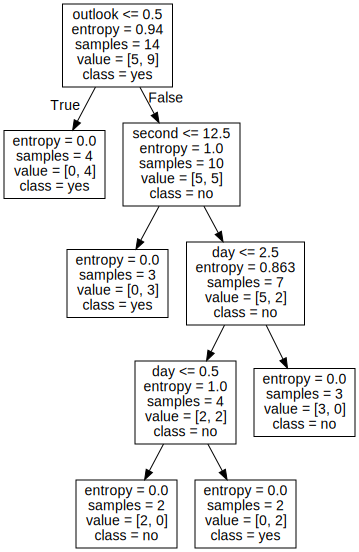

In [ ]:
# 학습 결과 확인 (graphviz 라이브러리 사용)
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names)) 
graph

In [ ]:
# 학습한 모델을 사용하여 예측
predict_result = decision_tree.predict(x_data)
# -> closed test = 내가 train 한 데이터로 test
# 예측 결과 출력 (실제 정답을 맞춘 경우 True로 표시됨)
print(predict_result == y_data)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool


## time의 second를 제외한 hour,minute을 이용했을 때의 그래프

In [ ]:
x_data1 = x_data.drop(columns = 'second')

In [ ]:
# Decision tree 모델 학습 ()
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
train_result = decision_tree.fit(x_data1, y_data)

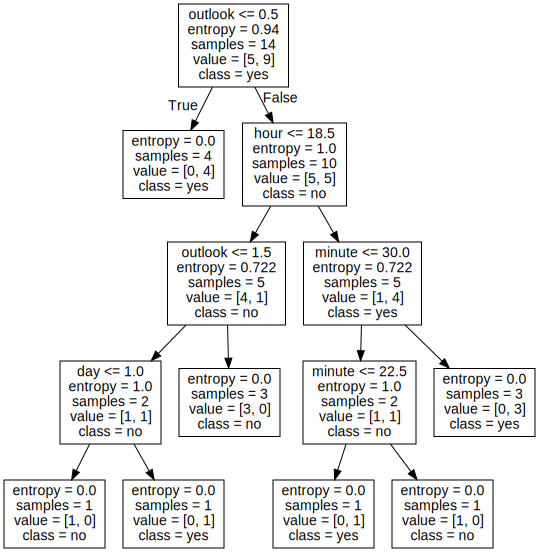

In [ ]:
# 학습 결과 확인 (graphviz 라이브러리 사용)
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data1.columns,
                                             class_names=target_names)) 
graph

In [ ]:
# 학습한 모델을 사용하여 예측
predict_result = decision_tree.predict(x_data1)
# -> closed test = 내가 train 한 데이터로 test
# 예측 결과 출력 (실제 정답을 맞춘 경우 True로 표시됨)
print(predict_result == y_data)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool


time의 second,minute를 제외한 hour을 이용했을 때의 그래프

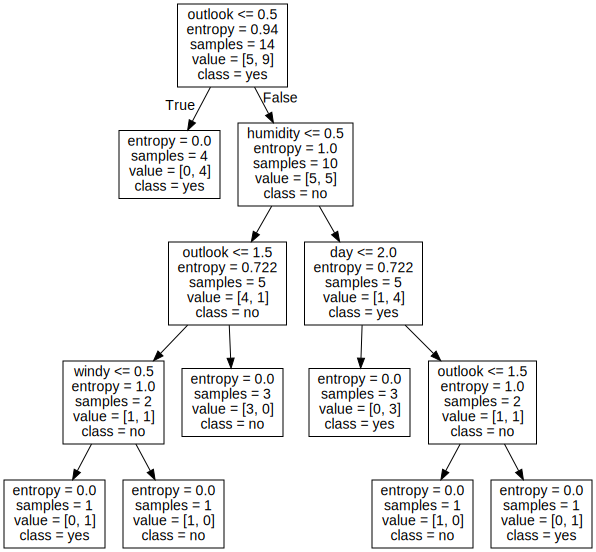

In [ ]:
x_data2 = x_data1.drop(columns = 'minute')
# Decision tree 모델 학습 ()
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
train_result = decision_tree.fit(x_data2, y_data)
# 학습 결과 확인 (graphviz 라이브러리 사용)
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data2.columns,
                                             class_names=target_names)) 
graph

### 결론 : time을 모두사용했을때와 그렇지 않았을 때 성능은 거의 비슷하나 모두 사용했을 때 노드의 개수가 더 적기 때문에 미세하게 빠를 것으로 보인다.